In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import data_utils
import download

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
def download_data():
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    download_dir = "./data"
    download.maybe_download_and_extract(url,download_dir)

In [ ]:
# Class to initialize and apply K-nearest neighbour classifier
class KNearestNeighbor(object):
    def __init__(self):
        pass

    # Method to initialize classifier with training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # Method to predict labels of test examples using 'compute_distances' and 'predict_labels' methods.
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, X, metric='euclidean'):
        if metric == 'euclidean':
            return self.euclidean_distance(X)
        elif metric == 'manhattan':
            return self.manhattan_distance(X)
        else:
            raise ValueError('Invalid metric: %s' % metric)

    #  Euclidean distances   
    def euclidean_distance(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        for i in range(num_test):
            dists[i,:] = np.sqrt(np.sum((self.X_train - X[i,:])**2, axis=1))
        return dists

    # Manhattan distances   
    def manhattan_distance(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        for i in range(num_test):
            dists[i,:] = np.sum(np.abs(self.X_train - X[i,:]), axis=1)
        return dists
    
    # Method to predict labels of test examples using chosen value of k given Euclidean distances obtained from 'compute_distances' method.
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i, :])[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred


In [ ]:
def visualize_data(X_train, y_train):
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(classes)
    samples_per_class = 7
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()


In [ ]:
if __name__ == "__main__":
    # Download CIFAR10 data and store it in the current directory if you have not done it.
#    download_data()
    cifar10_dir = './data/cifar-10-batches-py'

    # Load training and testing data from CIFAR10 dataset
    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

    # Checking the size of the training and testing data
    print('Training data shape: ', X_train.shape)
    print('Training labels shape: ', y_train.shape)
    print('Test data shape: ', X_test.shape)
    print('Test labels shape: ', y_test.shape)


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [ ]:
# sampling 10000 training examples and 1000 test examples
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [ ]:
# Reshape data and place into rows. Flatten the training and test data so each row
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)  # X_train should be (10000, 3072) and X_test should be (1000, 3072)

(10000, 3072) (1000, 3072)


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
   # Performing KNN
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances(X_test)

In [ ]:
  # Performing 5-fold cross validation to find the optimal k from choices 
num_folds = 5
k_choices = [1, 3, 5, 8, 10]

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

In [ ]:
k_to_accuracies = {}

distsVal = classifier.compute_distances(X_train_folds[0])
for k in k_choices:
    k_to_accuracies[k] = []  

    for fold in range(num_folds):
        start_idx = fold * (len(X_train_folds) // num_folds)
        end_idx = (fold + 1) * (len(X_train_folds) // num_folds)
        X_val_fold_current = X_train_folds[start_idx:end_idx]
        y_val_fold_current = y_train_folds[start_idx:end_idx]
        distsFold = distsVal[start_idx:end_idx]

        # Predicting labels for validation fold
        y_val_pred = classifier.predict_labels(distsFold, k=k)

        # Computing accuracy
        accuracy = np.mean(y_val_pred == y_val_fold_current)
        k_to_accuracies[k].append(accuracy)


Printing our 5-fold accuracies for varying values of k:

k = 1, accuracy = 0.103500
k = 1, accuracy = 0.105000
k = 1, accuracy = 0.100000
k = 1, accuracy = 0.097500
k = 1, accuracy = 0.104500
k = 3, accuracy = 0.103500
k = 3, accuracy = 0.108500
k = 3, accuracy = 0.107000
k = 3, accuracy = 0.097500
k = 3, accuracy = 0.108000
k = 5, accuracy = 0.103500
k = 5, accuracy = 0.102000
k = 5, accuracy = 0.107000
k = 5, accuracy = 0.108000
k = 5, accuracy = 0.104500
k = 8, accuracy = 0.103500
k = 8, accuracy = 0.102000
k = 8, accuracy = 0.100000
k = 8, accuracy = 0.108000
k = 8, accuracy = 0.108000
k = 10, accuracy = 0.103500
k = 10, accuracy = 0.102000
k = 10, accuracy = 0.100000
k = 10, accuracy = 0.108000
k = 10, accuracy = 0.104500
k = 1, avg. accuracy = 0.102100
k = 3, avg. accuracy = 0.104900
k = 5, avg. accuracy = 0.105000
k = 8, avg. accuracy = 0.104300
k = 10, avg. accuracy = 0.103600


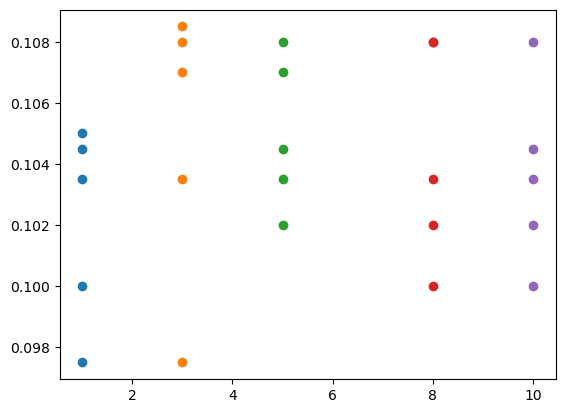

In [ ]:

print("Printing our 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))
    
for k in sorted(k_to_accuracies):
        print('k = %d, avg. accuracy = %f' % (k, sum(k_to_accuracies[k])/5))
    
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

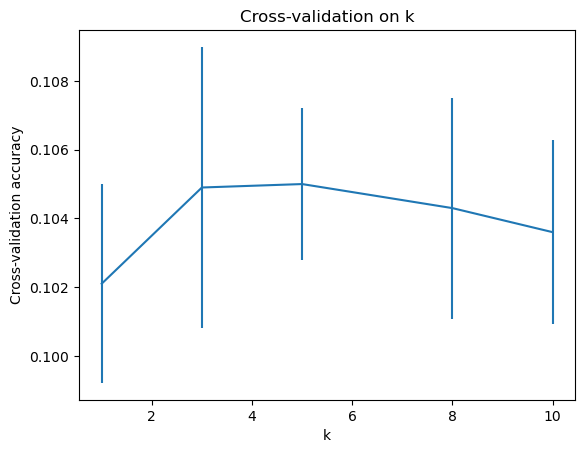

In [ ]:
 # Ploting the trendLine
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.savefig('cross-validation_accuracy.jpg')

In [ ]:
best_k = max(k_choices, key= lambda x: np.mean(k_to_accuracies[x]))
print("Best k = ",best_k)

Best k =  5


In [ ]:
# Trainning the classifier with the best k
classifier.train(X_train, y_train)

In [ ]:
# Predict labels for test data using the best k
y_test_pred = classifier.predict(X_test, k=best_k)

In [ ]:
# Computing and displaying the accuracy for best k found during cross-validation
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct on test data => accuracy: %f' % (num_correct, num_test, accuracy*100))

Got 296 / 1000 correct on test data => accuracy: 29.600000


**Bonus part** 
*(Comparing Accuracies Manhattan distance for k=5 and best value of k)*

In [ ]:
classifier_manhattan = KNearestNeighbor()

In [ ]:
# Trainning the classifier with the training data
classifier_manhattan.train(X_train, y_train)

In [ ]:
# Compute distances for the test set using Manhattan distance
dists_test_manhattan = classifier_manhattan.compute_distances(X_test, metric='manhattan')

In [ ]:
# Predict labels for test data using k=5 for Manhattan distance
y_test_pred_manhattan_5 = classifier_manhattan.predict_labels(dists_test_manhattan, k=5)

In [ ]:
# Predict labels for test data using the best k for Manhattan distance
y_testPred_ManhattanBest = classifier_manhattan.predict(X_test, k=best_k)

In [ ]:
# Computing and display the accuracies for Manhattan distance
accuracyManhattan = np.mean(y_test_pred_manhattan_5 == y_test)
accuracyManhattanBest = np.mean(y_testPred_ManhattanBest == y_test)

In [ ]:
print('\nAccuracy on test data with k = 5 (Manhattan Distance): ' , accuracyManhattan*100)
print()
print('Accuracy on test data with best k for Manhattan Distance:' , accuracyManhattanBest*100)


Accuracy on test data with k = 5 (Manhattan Distance):  31.0

Accuracy on test data with best k for Manhattan Distance: 29.599999999999998
